<a href="https://colab.research.google.com/github/Enoch-Onwuka/ML_Casestudies/blob/master/Length_of_Stay_Prediction_19_01_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hospital Length of Stay (LOS) Prediction**


## **Context:**

Hospital management is a vital area that gained a lot of attention during the COVID-19 pandemic. **Inefficient distribution of resources like beds, ventilators might lead to a lot of complications**. However, this can be mitigated by **predicting the length of stay (LOS) of a patient before getting admitted**. Once this is determined, the hospital can plan a suitable treatment, resources, and staff to reduce the Length of Stay and increase the chances of recovery. The rooms and bed can also be planned in accordance with the intended solution.

**Hospitals has been incurring a lot of losses in revenue and life due to its inefficient management system.** They have been unsuccessful in allocating pieces of equipment, beds, and hospital staff fairly. **A system that could estimate the length of stay (LOS) of a patient can solve this problem to a great extent.**

## **Objective:**

To analyze the data, find out **what factors that mostly affect patients length of stay, LOS and come up with a machine learning model which can predict the Length of Stay of a patient** using the data available during admission and after running a few tests. Also, **bring about useful insights and policies from the data, which can help the hospital to improve their health care infrastructure and revenue.**

## **Data Dictionary:**

The data contains various information recorded during the time of admission of the patient. It only contains **records of patients who were admitted to the hospital.** The detailed data dictionary is given below:
			
* **case_id**:	            Case_ID registered in Hospital			
* **Hospital_code**:	    Unique code for the Hospital			
* **Hospital_type_code**:	Unique code for the type of Hospital		
* **City_Code_Hospital**:	City Code of the Hospital			
* **Hospital_region_code**:	Region Code of the Hospital			
* **Available Extra Rooms in Hospital**:	Number of Extra rooms available in the Hospital	
* **Department**:	        Department overlooking the case		
* **Ward_Type**:	        Code for the Ward type			
* **Ward_Facility_Code**:	Code for the Ward Facility			
* **Bed Grade**:	        Condition of Bed in the Ward			
* **Patientid**:	        Unique Patient Id				
* **City_Code_Patient**:	City Code for the patient			
* **Type of Admission**:	Admission Type registered by the Hospital	
* **Severity of Illness**:	Severity of the illness recorded at the time of admission
* **Visitors with Patient**:Number of Visitors with the patient		
* **Age**:	                Age of the patient				
* **Admission_Deposit**:	Deposit at the Admission Time			
* **Stay**:	                Stay Days by the patient			



## **Approach to solve the problem:**

1. Import the necessary libraries.
2. Read the dataset and get an overview.
3. Exploratory data analysis. a.Univariate b.Bivariate.
4. Data preprocessing if any.
5. Define the performance metric and build ML models
6. Checking for assumptions
7. Compare models and determine the best one.
8. Observations and business insights.

## **Importing Libraries**

In [ ]:


# importing the required libraries
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import mean

# To help with model building
from sklearn.linear_model import LogisticRegression

# To build classification models 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import pickle

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# Setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

#for tuning the model
from sklearn.model_selection import GridSearchCV

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    classification_report,
    precision_recall_curve
)


import warnings
warnings.filterwarnings("ignore")

In [ ]:
#read the healthcare dataset file
data=pd.read_csv(r'/content/data.csv')

In [ ]:
# copying data to another variable to avoid any changes to original data
same_data = data.copy()

## **Data Overview**

In [ ]:
# View the first 5 rows of the dataset
data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.00000,31397,7.00000,Emergency,Extreme,2.00000,51-60,4911.00000,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.00000,31397,7.00000,Trauma,Extreme,2.00000,51-60,5954.00000,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.00000,31397,7.00000,Trauma,Extreme,2.00000,51-60,4745.00000,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.00000,31397,7.00000,Trauma,Extreme,2.00000,51-60,7272.00000,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.00000,31397,7.00000,Trauma,Extreme,2.00000,51-60,5558.00000,41-50


In [ ]:
# View the last 5 rows of the dataset
data.tail()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
186255,186256,6,a,6,X,2,gynecology,R,F,2.00000,98764,3.00000,Emergency,Extreme,3.00000,31-40,5046.00000,31-40
186256,186257,10,e,1,X,2,gynecology,S,E,1.00000,98764,3.00000,Emergency,Extreme,2.00000,31-40,4565.00000,11-20
186257,186258,21,c,3,Z,3,gynecology,R,A,3.00000,98764,3.00000,Emergency,Extreme,3.00000,31-40,9104.00000,41-50
186258,186259,13,a,5,Z,2,gynecology,R,F,3.00000,98764,3.00000,Emergency,Extreme,3.00000,31-40,6349.00000,31-40
186259,186260,9,d,5,Z,2,gynecology,Q,F,3.00000,98764,3.00000,Emergency,Ext,NaN,NaN,NaN,NaN


In [ ]:
#Understand the shape of the data
data.shape

(186260, 18)

- The dataset has **318,438 rows and 18 columns**

In [ ]:
#Checking the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186260 entries, 0 to 186259
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            186260 non-null  int64  
 1   Hospital_code                      186260 non-null  int64  
 2   Hospital_type_code                 186260 non-null  object 
 3   City_Code_Hospital                 186260 non-null  int64  
 4   Hospital_region_code               186260 non-null  object 
 5   Available Extra Rooms in Hospital  186260 non-null  int64  
 6   Department                         186260 non-null  object 
 7   Ward_Type                          186260 non-null  object 
 8   Ward_Facility_Code                 186260 non-null  object 
 9   Bed Grade                          186192 non-null  float64
 10  patientid                          186260 non-null  int64  
 11  City_Code_Patient                  1840

**Observations:**

-  case_id,Hospital_codeAvailable Extra Rooms in Hospital, patientid,  City_Code_Patient, Bed Grade, Visitors with Patient, Admission_Deposit are of **numeric data type** and the rest of the columns are of **object data type*.
- The number of non-null values is not the same as the total number of entries in the Bed Grade & patient_id data i.e. **there are null values.**
- The column patientid is an identifier for patients in the data. 

In [ ]:
# checking for duplicate values in the Data
data.duplicated().sum()

0

**Observations:** 
- Data has unique rows only. There is no need to remove any rows.

In [ ]:
# Treating the null values
data['Bed Grade'] = data['Bed Grade'].fillna(data['Bed Grade'].value_counts().index[0])
data['City_Code_Patient'] = data['City_Code_Patient'].fillna(data['City_Code_Patient'].value_counts().index[0])
data.isnull().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                1
Age                                  1
Admission_Deposit                    1
Stay                                 1
dtype: int64

In [ ]:
# Stay Unique values
data.Stay.unique()

array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100', nan],
      dtype=object)

We need to get an average of the stay days to enable us analyze and visual the data

In [ ]:
# Converting bins to average

data['Average_Stay'] = data['Stay'].replace({'0-10':5.5, '11-20':15.5, '21-30':25.5, '31-40':35.5, '41-50':45.5, '51-60':55.5, '61-70':65.5,
       '71-80':75.5, '81-90':85.5, '91-100':95.5, 'More than 100 Days':105.5})

In [ ]:
#Convert to Float
data['Average_Stay'].astype(float)

0         5.50000
1        45.50000
2        35.50000
3        45.50000
4        45.50000
           ...   
186255   35.50000
186256   15.50000
186257   45.50000
186258   35.50000
186259        NaN
Name: Average_Stay, Length: 186260, dtype: float64

In [ ]:
# Replacing 'More than 100 Days'

data['Stay'] = data['Stay'].replace({'More than 100 Days': '> 100'})

In [ ]:
data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,Average_Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.00000,31397,7.00000,Emergency,Extreme,2.00000,51-60,4911.00000,0-10,5.50000
1,2,2,c,5,Z,2,radiotherapy,S,F,2.00000,31397,7.00000,Trauma,Extreme,2.00000,51-60,5954.00000,41-50,45.50000
2,3,10,e,1,X,2,anesthesia,S,E,2.00000,31397,7.00000,Trauma,Extreme,2.00000,51-60,4745.00000,31-40,35.50000
3,4,26,b,2,Y,2,radiotherapy,R,D,2.00000,31397,7.00000,Trauma,Extreme,2.00000,51-60,7272.00000,41-50,45.50000
4,5,26,b,2,Y,2,radiotherapy,S,D,2.00000,31397,7.00000,Trauma,Extreme,2.00000,51-60,5558.00000,41-50,45.50000


In [ ]:
#To view patientid and the number of times they have visited the hospital
data['patientid'].value_counts()

38525     39
101359    36
32886     32
31203     30
126596    29
          ..
37260      1
94147      1
10909      1
42556      1
7609       1
Name: patientid, Length: 41765, dtype: int64

**Observations:**
- **The maximum number of times the same patient admitted to the hospital is 50 and minimum is 1.**

In [ ]:
#To view Visitors with Patient and the number of times they have visited the hospital
data['Visitors with Patient'].value_counts()

2.00000     81334
4.00000     46249
3.00000     33922
6.00000     11217
5.00000      5590
8.00000      2885
7.00000      1483
9.00000       781
1.00000       699
10.00000      681
12.00000      574
11.00000      202
16.00000      165
15.00000      122
14.00000      111
13.00000       72
20.00000       43
24.00000       32
18.00000       28
17.00000       12
0.00000        11
30.00000        9
23.00000        8
21.00000        8
22.00000        8
19.00000        6
25.00000        6
32.00000        1
Name: Visitors with Patient, dtype: int64

**Observations:**
- **The maximum number of times the same Visitor with Patient visited the hospital is 138,417 and minimum is 9.**

In [ ]:
#Checking the descriptive statistics of the columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
case_id,186260.00000,93130.50000,53768.77491,1.00000,46565.75000,93130.50000,139695.25000,186260.00000
Hospital_code,186260.00000,18.58407,8.62024,1.00000,11.00000,19.00000,26.00000,32.00000
City_Code_Hospital,186260.00000,4.80119,3.09442,1.00000,2.00000,5.00000,7.00000,13.00000
Available Extra Rooms in Hospital,186260.00000,3.16495,1.14875,0.00000,2.00000,3.00000,4.00000,21.00000
Bed Grade,186260.00000,2.61554,0.87177,1.00000,2.00000,3.00000,3.00000,4.00000
patientid,186260.00000,65894.93470,38025.03795,2.00000,32955.00000,65885.50000,98590.50000,131621.00000
City_Code_Patient,186260.00000,7.02880,4.45012,1.00000,4.00000,8.00000,8.00000,37.00000
Visitors with Patient,186259.00000,3.28672,1.76013,0.00000,2.00000,3.00000,4.00000,32.00000
Admission_Deposit,186259.00000,4912.70513,1065.30089,1800.00000,4231.00000,4780.00000,5435.00000,11008.00000
Average_Stay,186259.00000,33.38681,21.60513,5.50000,15.50000,25.50000,35.50000,105.50000


**Observations :**

* There are around **3 rooms available in the hospital on an average** and there are times when the hospital is full and there are no rooms available. The **maximum number of rooms available in the hospital are 24**.
* **On average there Bed Grade 3 is available to new patients** but it can also be 1 at times. The maximum Bed Grade available in the hospital is 4.
* **On average around 3 visitors accompany the patient.** Some patients come on their own (minimum zero) and few cases have 32 visitors. It will be interesting to see if there is any relation between number of visitors and the severity of the patient.
* **The average admission deposit lies around 4741 dollars and a minimum of 1800 dollars is paid on every admission.**
* **Patient's stay has a large range from 5.5 to 105.5 days.** There might be outliers in this variable. The median length of stay is 25.5 days and there is a possibility of outliers for the patient stay days.

In [ ]:
# List of all important categorical variables
cat_col = ["Department", "Type of Admission", 'Severity of Illness', 'Ward_Type', 'Hospital_region_code', 'Hospital_type_code', 'Stay', "Ward_Facility_Code", "Age", "Stay"]

# Printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(data[column].value_counts(1)*100)
    print("-")

gynecology           77.54912
anesthesia            9.74659
radiotherapy          9.32567
TB & Chest disease    2.95125
surgery               0.42736
Name: Department, dtype: float64
-
Trauma      50.94331
Emergency   37.49651
Urgent      11.56018
Name: Type of Admission, dtype: float64
-
Moderate   57.35101
Minor      21.95372
Extreme    20.69473
Ext         0.00054
Name: Severity of Illness, dtype: float64
-
R   40.34468
Q   32.47396
S   25.11436
P    1.56716
T    0.49501
U    0.00483
Name: Ward_Type, dtype: float64
-
X   41.79963
Y   39.00086
Z   19.19951
Name: Hospital_region_code, dtype: float64
-
a   45.14764
b   22.01707
c   13.90422
e    8.09460
d    6.22463
f    3.47686
g    1.13497
Name: Hospital_type_code, dtype: float64
-
21-30    28.31541
11-20    23.11459
31-40    17.73713
51-60    11.72614
0-10      6.33902
41-50     3.71418
71-80     3.45165
> 100     2.14594
81-90     1.64287
91-100    0.92720
61-70     0.88586
Name: Stay, dtype: float64
-
F   35.66627
E   17.20337
D  

**Observations :**

- **The majority of patients (~55%) admit to the hospital with moderate and minor illness** which is understandable as extreme illness is less frequent than moderate and minor illness. 
- **Gynecology department gets the most number of patients (~78%)** in the hospital whereas patients in Surgery department are (~0%).
- **Ward A and B accommodate the least number of patients (~12%).** These might be wards reserved for patient with extreme illness and patients who need surgery. It would be interesting to see if patients from these wards also stay for longer duration.
- **The majority of patients belong to the age group of 21-80 (\~87%)** These are most likely to be women since the number of patients in the gynecology department of the hospital is 78%.
- Most of the patients admitted to the hospital are the **cases of trauma (~48%)**. 
- **The most of the patients' legnth of stay in the hospital is between the range of 11-40 days and on a rare occasions does  a patient stay more than 40 days while the minimum lenght of stay is between the range of 0-10 days.**


## **Exploratory Data Analysis (EDA)**

### **Univariate Analysis** 

OUTLIER DETECTION

IQR (Inter Quartile Range) approach to finding the outliers is the most commonly used and most trusted approach used in the research field

In [ ]:
# Let's create a function to plot a boxplot and a histogram along the same scale to visualize the outliers


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Visualizing and Treating the Outliers

#### City Code Patient

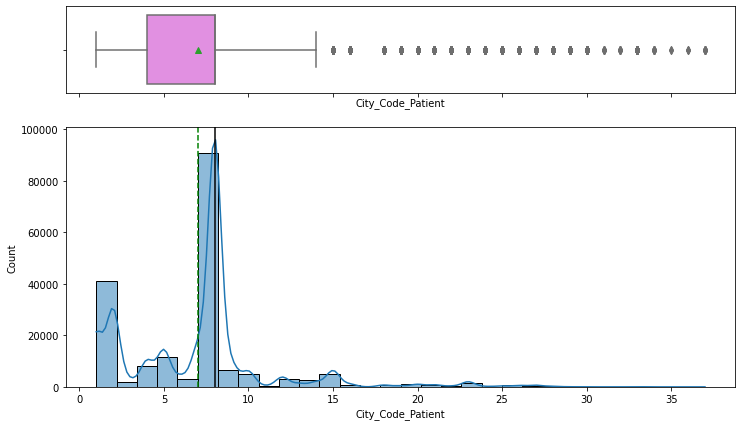

In [ ]:
histogram_boxplot(data, "City_Code_Patient", kde=True, bins=30)

In [ ]:
# IQR for City_Code_Patient

upper_limit = data['City_Code_Patient'].mean() + 3*data['City_Code_Patient'].std()
lower_limit = data['City_Code_Patient'].mean() - 3*data['City_Code_Patient'].std()

data['City_Code_Patient'] = np.where(
    data['City_Code_Patient']>upper_limit,
    upper_limit,
    np.where(
        data['City_Code_Patient']<lower_limit,
        lower_limit,
        data['City_Code_Patient']
    )
)

print("upper limit",data['City_Code_Patient'].mean() + 3*data['City_Code_Patient'].std())
print("lower limit",data['City_Code_Patient'].mean() - 3*data['City_Code_Patient'].std())


upper limit 19.266723086127644
lower limit -5.389027936630466


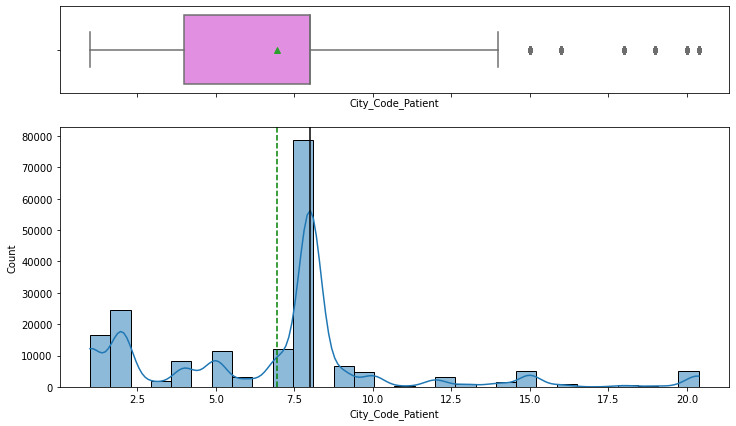

In [ ]:
histogram_boxplot(data, "City_Code_Patient", kde=True, bins=30)

#### **Visitors with Patient**

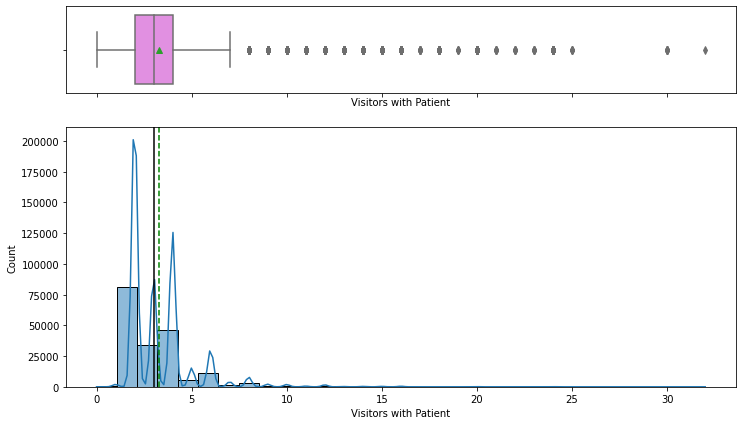

In [ ]:
histogram_boxplot(data, "Visitors with Patient", kde=True, bins=30)

- **Observations**:

The distribution of the number of visitors with the patient is highly skewed towards right.
2 and 4 are the most common number of visitors with patients.

In [ ]:
# IQR for Visitors with Patient

upper_limit = data['Visitors with Patient'].mean() + 3*data['Visitors with Patient'].std()
lower_limit = data['Visitors with Patient'].mean() - 3*data['Visitors with Patient'].std()


data['Visitors with Patient'] = np.where(
    data['Visitors with Patient']>upper_limit,
    upper_limit,
    np.where(
        data['Visitors with Patient']<lower_limit,
        lower_limit,
        data['Visitors with Patient']
    )
)

print("upper limit",data['Visitors with Patient'].mean() + 3*data['Visitors with Patient'].std())
print("lower limit",data['Visitors with Patient'].mean() - 3*data['Visitors with Patient'].std())


upper limit 7.786585845753165
lower limit -1.3072102440609745


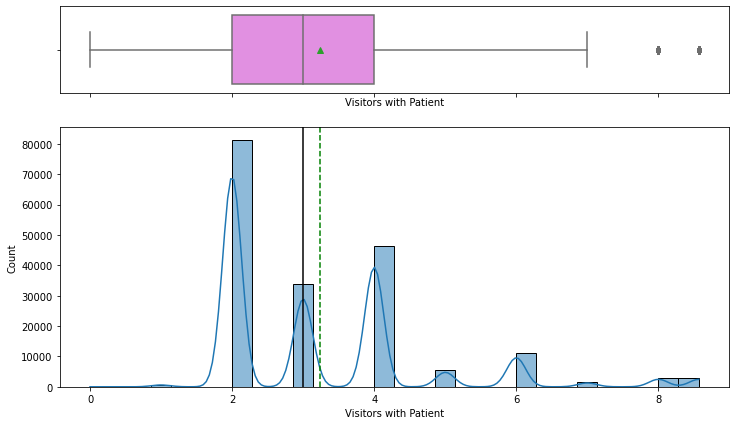

In [ ]:
histogram_boxplot(data, 'Visitors with Patient', kde=True, bins=30)

#### Admission_Deposit

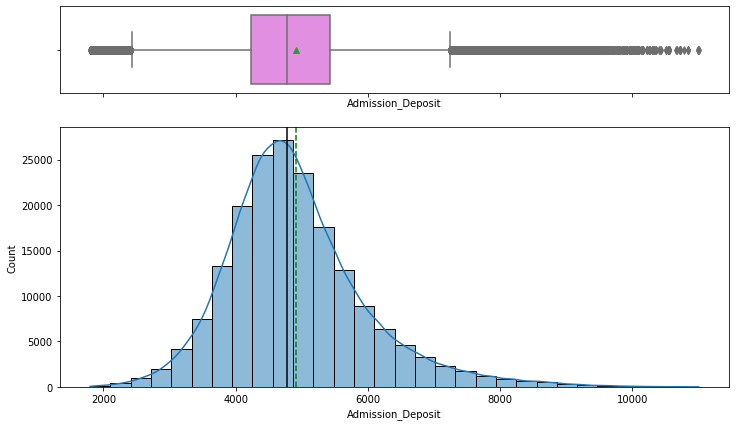

In [ ]:
histogram_boxplot(data, "Admission_Deposit", kde=True, bins=30)

**Observations:**

- The ** admission Deposits is normally distributed**. There are few patients paying high amount of admission fees and few patients paying low amount of admission fees.

In [ ]:
# IQR for Admission Deposit

upper_limit = data['Admission_Deposit'].mean() + 3*data['Admission_Deposit'].std()
lower_limit=data['Admission_Deposit'].mean() - 3*data['Admission_Deposit'].std()

data['Admission_Deposit'] = np.where(
    data['Admission_Deposit']>upper_limit,
    upper_limit,
    np.where(
        data['Admission_Deposit']<lower_limit,
        lower_limit,
        data['Admission_Deposit']
    )
)

print("upper limit",data['Admission_Deposit'].mean() + 3*data['Admission_Deposit'].std())
print("lower limit",data['Admission_Deposit'].mean() - 3*data['Admission_Deposit'].std())


upper limit 8010.366813154476
lower limit 1798.2663776955633


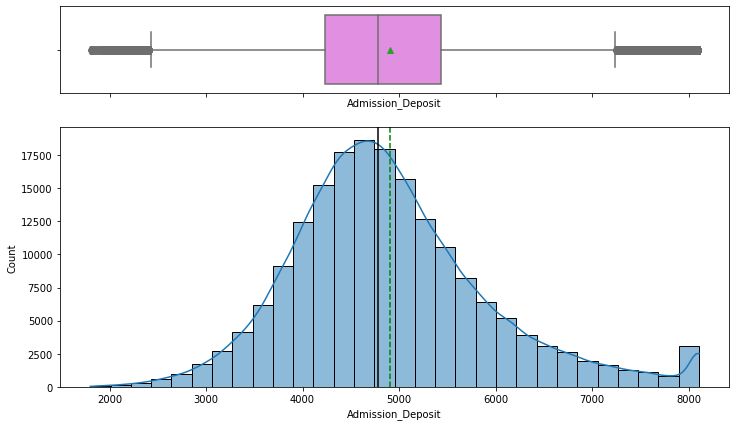

In [ ]:
histogram_boxplot(data, "Admission_Deposit", kde=True, bins=30)

#### **Average_Stay**

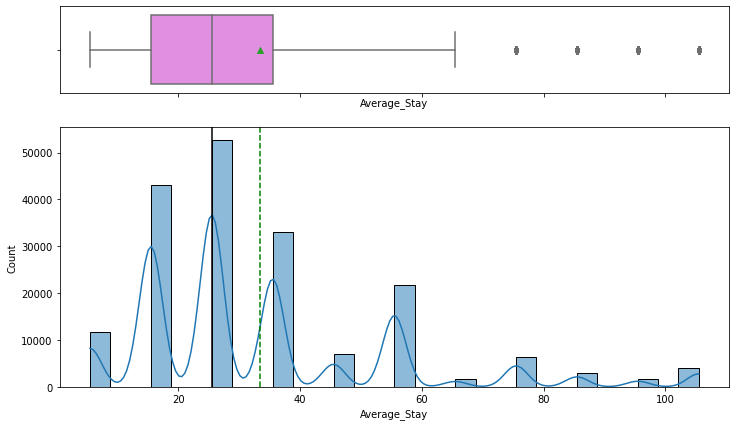

In [ ]:
histogram_boxplot(data, "Average_Stay", kde=True, bins=30)

**Observations:**

- The distribution of the number of Average_Stay is **highly skewed towards right**.
- There are fewer number of patients staying more than 10 days in the hospital and very few who stay for more than 40 days. This might be because the majority of patients are admitted for moderate or minor illness.
- The peak of the distribution shows that the the most of the patients stay for 25-30 days in the hospital. From the Histogram, the outliers are found at the point beyond 60 average stay days


In [ ]:
# IQR for Admission Deposit

upper_limit = data['Average_Stay'].mean() + 3*data['Average_Stay'].std()
lower_limit = data['Average_Stay'].mean() - 3*data['Average_Stay'].std()

data['Average_Stay'] = np.where(
    data['Average_Stay']>upper_limit,
    upper_limit,
    np.where(
        data['Average_Stay']<lower_limit,
        lower_limit,
        data['Average_Stay']
    )
)

print("upper limit",data['Average_Stay'].mean() + 3*data['Average_Stay'].std())
print("lower limit",data['Average_Stay'].mean() - 3*data['Average_Stay'].std())

upper limit 96.53755627117832
lower limit -30.077140837472292


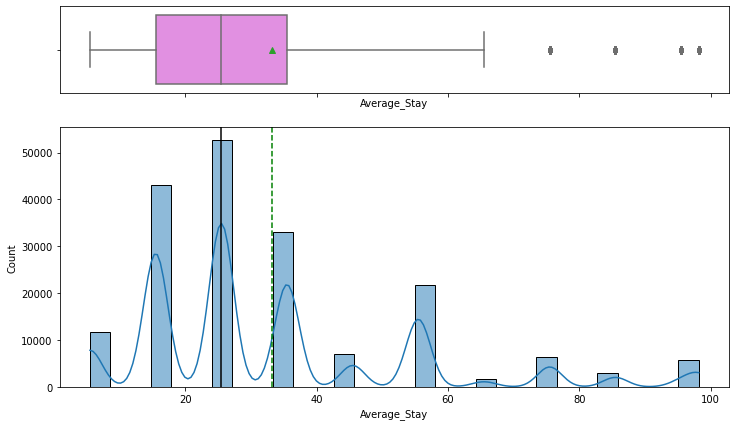

In [ ]:
histogram_boxplot(data, "Average_Stay", kde=True, bins=30)

In [ ]:
# Let's check the zscores

from scipy import stats
data['Average_Stay'] = stats.zscore(data['Average_Stay'])
data['Average_Stay'].describe().round(3)

count   0.00000
mean        NaN
std         NaN
min         NaN
25%         NaN
50%         NaN
75%         NaN
max         NaN
Name: Average_Stay, dtype: float64

The scaled results show a mean of 0.000 and a standard deviation of 1.000, indicating that the transformed values fit the z-scale model. The max value of 2 and it's below the z-score limit of +3.

In [ ]:
data['City_Code_Patient'] = stats.zscore(data['City_Code_Patient'])
data['City_Code_Patient'].describe().round(3)

count   186260.00000
mean         0.00000
std          1.00000
min         -1.44500
25%         -0.71500
50%          0.25800
75%          0.25800
max          3.27100
Name: City_Code_Patient, dtype: float64

The scaled results show a mean of 0.000 and a standard deviation of 1.000, indicating that the transformed values fit the z-scale model. The max value of 3 and the z-score limit of +3.

In [ ]:
data['Visitors with Patient'] = stats.zscore(data['Visitors with Patient'])
data['Visitors with Patient'].describe().round(3)

count   0.00000
mean        NaN
std         NaN
min         NaN
25%         NaN
50%         NaN
75%         NaN
max         NaN
Name: Visitors with Patient, dtype: float64

The scaled results show a mean of 0.000 and a standard deviation of 1.000, indicating that the transformed values fit the z-scale model. The max value of 4 this is an indication of the presence of outliers. we can accept this as it's just a little above  the z-score limit of +3.

In [ ]:
data['Admission_Deposit'] = stats.zscore(data['Admission_Deposit'])
data['Admission_Deposit'].describe().round(3)

count   0.00000
mean        NaN
std         NaN
min         NaN
25%         NaN
50%         NaN
75%         NaN
max         NaN
Name: Admission_Deposit, dtype: float64

The scaled results show a mean of 0.000 and a standard deviation of 1.000, indicating that the transformed values fit the z-scale model. The max value of 2.95 and it's below the z-score limit of +3.

In [ ]:
data.shape

(186260, 19)

**Thus, we have been able to remove outliers to a statiscally acceptable range.**

### **Bivariate Analysis**

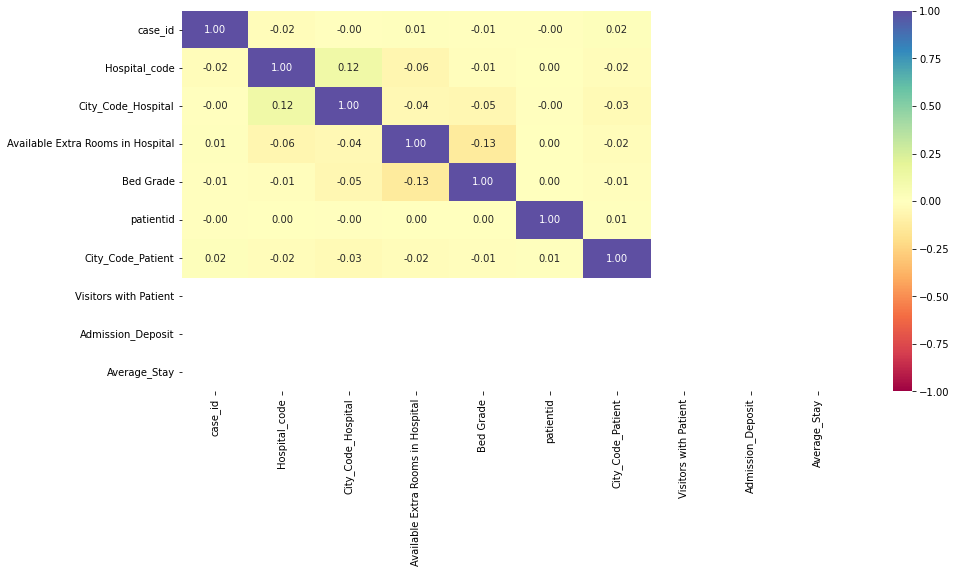

In [ ]:
#finding the correlation between various columns of the dataset
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f",cmap="Spectral")

**Observations:** 
- The heatmap shows that there is **correlation between Average Stay and Visitors with Patient variables**.
- Most of the continuous variables shows no correlation with the target variable Stay which indicates that the **categorical variables might be more important for the prediction.**

In [ ]:
# function to plot stacked bar plots


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

**Let's start by checking the distribution of the LOS for the various wards**

Department          TB & Chest disease  anesthesia  gynecology  radiotherapy  \
Ward_Facility_Code                                                             
All                               5497       18154      144443         17370   
F                                 2111        7251       50973          5889   
C                                  284         496       18565          2743   
E                                  913        3904       24558          2525   
D                                 1115        3504       22454          3141   
B                                  633        1576       15999          1741   
A                                  441        1423       11894          1331   

Department          surgery     All  
Ward_Facility_Code                   
All                     796  186260  
F                       208   66432  
C                       207   22295  
E                       143   32043  
D                       121   30335  
B            

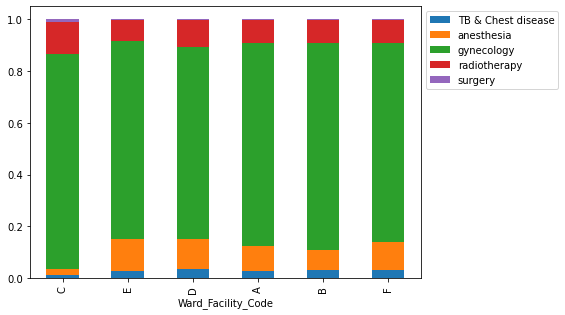

In [ ]:
stacked_barplot(data, "Ward_Facility_Code", "Department")

**Observations:**

- **All the Ward Facilities are are mostly used by the gynecology department.**
- While all the Wards have patients with all other diseases the Surgery department does not make use of any of the wards for patients undergoing surgery.

Stay     0-10  11-20  21-30  31-40  41-50  51-60  61-70  71-80  81-90  91-100  \
Age                                                                             
All     11807  43053  52740  33037   6918  21841   1650   6429   3060    1727   
41-50    2452   8308  10938   6683   1549   4463    320   1318    557     369   
31-40    2497   8932  11333   6654   1432   4060    313   1135    497     288   
51-60    1751   6475   8067   5216   1028   3630    284   1083    512     313   
71-80    1287   5010   6385   4205    872   2951    249    946    462     262   
61-70    1245   4755   5777   3694    737   2715    185    771    393     203   
21-30    1568   5692   6268   3791    745   2225    149    604    317     140   
81-90     267    943   1311   1025    233    729     73    268    142      90   
11-20     563   2217   1977   1258    214    718     44    187    121      30   
91-100     51    141    172    142     44    113     21     43     17      12   
0-10      126    580    512 

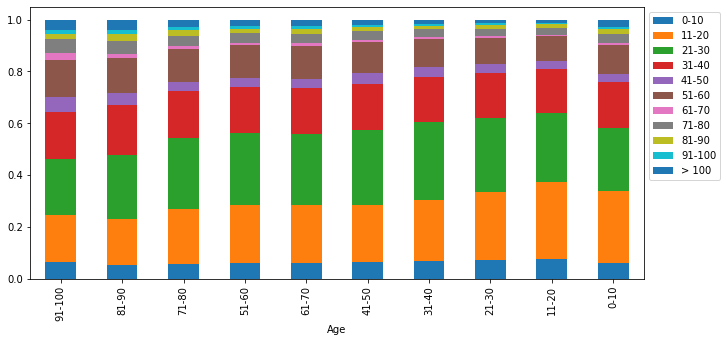

In [ ]:
stacked_barplot(data, "Age", "Stay")     
plt.show()

**Observations :**

- 11 to 40 stay days range are more prominent across all age ranges
- Age range 0 to 20 years has the highest stay days of 11 to 20 days
- Age range 0 to 10 also has the least stay days of 0 to 10 days

**Usually, the more severe the illness, the more the LOS, let's check the distribution of severe patients in various wards**

Severity of Illness  Ext  Extreme  Minor  Moderate     All
Ward_Facility_Code                                        
F                      1    12791  15254     38386   66432
All                    1    38546  40891    106822  186260
A                      0     3233   3210      8699   15142
B                      0     4593   4148     11272   20013
C                      0     5392   3919     12984   22295
D                      0     6565   6481     17289   30335
E                      0     5972   7879     18192   32043
------------------------------------------------------------------------------------------------------------------------


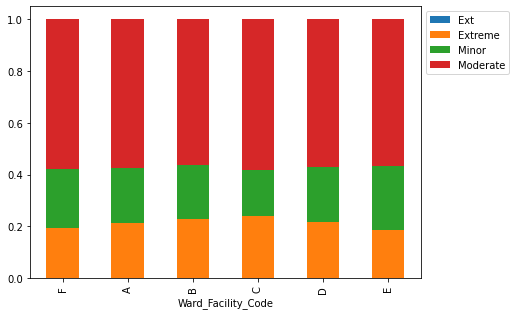

In [ ]:
stacked_barplot(data, "Ward_Facility_Code", "Severity of Illness")

**Observations :**

- Ward C has the most extreme case and large number of moderate cases as well as the longest length of stay in the hospital. It might require more staff and resources as compared to other wards.
- Ward E has a large number of minor cases and Ward E has .

## **Data Preparation for Model Building**

- Before we proceed to build a model, we'll have to encode categorical features.
- Separate the independent variables and dependent Variable.
- We'll split the data into train and test to be able to evaluate the model that we train on the training data.

In [ ]:
data.Stay.unique()

array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
       '> 100', '81-90', '61-70', '91-100', nan], dtype=object)

In [ ]:
data["Stay"].value_counts(1)*100

21-30    28.31541
11-20    23.11459
31-40    17.73713
51-60    11.72614
0-10      6.33902
41-50     3.71418
71-80     3.45165
> 100     2.14594
81-90     1.64287
91-100    0.92720
61-70     0.88586
Name: Stay, dtype: float64

The count shows that the median length of stay (24%) falls between 21-30 and 31-40 days

Thus, 0-30 = Short Stay and > 30 = Long Stay

In [ ]:
#Let's restructure the target vaiable (Stay) to align with the observed categories
data['Stay_days'] = data['Stay'].replace({'0-10':'0-30', '11-20':'0-30','21-30':'0-30', '31-40':'> 30',\
                                          '41-50':'> 30', '51-60':'> 30', '71-80':'> 30', '> 100':'> 30',\
                                          '81-90':'> 30', '61-70':'> 30','91-100':'> 30'
      })

In [ ]:
data.Stay_days.unique()

array(['0-30', '> 30', nan], dtype=object)

In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
data['Stay_days']= label_encoder.fit_transform(data['Stay_days'])

data['Stay_days'].unique()

array([0, 1, 2])

In [ ]:
data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,Average_Stay,Stay_days
0,1,8,c,3,Z,3,radiotherapy,R,F,2.00000,31397,0.01488,Emergency,Extreme,NaN,51-60,NaN,0-10,NaN,0
1,2,2,c,5,Z,2,radiotherapy,S,F,2.00000,31397,0.01488,Trauma,Extreme,NaN,51-60,NaN,41-50,NaN,1
2,3,10,e,1,X,2,anesthesia,S,E,2.00000,31397,0.01488,Trauma,Extreme,NaN,51-60,NaN,31-40,NaN,1
3,4,26,b,2,Y,2,radiotherapy,R,D,2.00000,31397,0.01488,Trauma,Extreme,NaN,51-60,NaN,41-50,NaN,1
4,5,26,b,2,Y,2,radiotherapy,S,D,2.00000,31397,0.01488,Trauma,Extreme,NaN,51-60,NaN,41-50,NaN,1


In [ ]:
#Dropping patientid and case_id from the data as it is an identifier and will not add value to the analysis
X_drop = data.drop([],axis=1)
X_drop = data.drop(['Stay','case_id', 'patientid', 'Average_Stay', 'Stay_days' ], axis=1)

#Separating independent variables and the target variable
y=data['Stay_days']

In [ ]:
# Creating dummy variables for the categorical columns
#drop_first=True is used to avoid redundant variables
X = pd.get_dummies(
    X_drop,
    columns=X_drop.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

In [ ]:
X.head()

,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,City_Code_Patient,Visitors with Patient,Admission_Deposit,Hospital_type_code_b,Hospital_type_code_c,Hospital_type_code_d,Hospital_type_code_e,Hospital_type_code_f,Hospital_type_code_g,Hospital_region_code_Y,Hospital_region_code_Z,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Ward_Type_Q,Ward_Type_R,Ward_Type_S,Ward_Type_T,Ward_Type_U,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F,Type of Admission_Trauma,Type of Admission_Urgent,Severity of Illness_Extreme,Severity of Illness_Minor,Severity of Illness_Moderate,Age_11-20,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-90,Age_91-100
0,8,3,3,2.00000,0.01488,NaN,NaN,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,2,5,2,2.00000,0.01488,NaN,NaN,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0
2,10,1,2,2.00000,0.01488,NaN,NaN,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
3,26,2,2,2.00000,0.01488,NaN,NaN,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
4,26,2,2,2.00000,0.01488,NaN,NaN,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
X.shape

(186260, 43)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=[
       'Hospital_code', 'City_Code_Hospital',
       'Available Extra Rooms in Hospital', 'Bed Grade', 'City_Code_Patient',
       'Visitors with Patient', 'Admission_Deposit', 'Hospital_type_code_b',
       'Hospital_type_code_c', 'Hospital_type_code_d', 'Hospital_type_code_e',
       'Hospital_type_code_f', 'Hospital_type_code_g',
       'Hospital_region_code_Y', 'Hospital_region_code_Z',
       'Department_anesthesia', 'Department_gynecology',
       'Department_radiotherapy', 'Department_surgery', 'Ward_Type_Q',
       'Ward_Type_R', 'Ward_Type_S', 'Ward_Type_T', 'Ward_Type_U',
       'Ward_Facility_Code_B', 'Ward_Facility_Code_C', 'Ward_Facility_Code_D',
       'Ward_Facility_Code_E', 'Ward_Facility_Code_F',
       'Type of Admission_Trauma', 'Type of Admission_Urgent',
       'Severity of Illness_Minor', 'Severity of Illness_Moderate',
       'Age_11-20', 'Age_21-30', 'Age_31-40', 'Age_41-50', 'Age_51-60',
       'Age_61-70', 'Age_71-80', 'Age_81-90', 'Age_91-100'])


ValueError: ignored

In [ ]:
X_scaled.head()

#### BALANCING THE DATASET

In [ ]:
from imblearn.over_sampling import SMOTE

#SMOTE
smote_os = SMOTE(random_state = 42)
X_scaled, y = smote_os.fit_resample(X, y)

In [ ]:
pd.Series(y).value_counts()

In [ ]:
# SEPARATE DATA
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=1, stratify=y)

### **Model evaluation criterion**

**The model can make two types of wrong predictions:**
1. Predicting a Short Stay and the Patient have a Long Stay
2. Predicting a Long Stay and the Patient have a Short Stay

**Which case is more important?**
* Predicting that the Patient will have a Short Stay but the actually have a Long Stay i.e. impacting the efficiency of the hospital management system as a result of improper planning. 

**How to reduce this loss i.e the need to reduce False Negatives?**
* **Hospital would want `Recall` to be maximized**, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives (i.e. Class 1) so that the hospital can identify patients with the risk of staying longer. 

**Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.**

In [ ]:
# Creating metric function 

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted, target_names=['0-30 days', '> 30 days']))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Short Stay', 'Long Stay'], yticklabels=['Short Stay', 'Long Stay'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## **Building the model**

We will be building 4 different models:

- **Logistic Regression**
- **Decision Tree**
- **Random Forest**
- **XGBoost**


### **Logistic Regression Model**

- Logistic Regression is a supervised learning algorithm that is used for **binary classification problems** i.e. where the dependent variable is categorical and has only two possible values. In logistic regression, we use the sigmoid function to calculate the probability of an event y, given some features x as:

                                          P(y)=1/exp(1 + exp(-x))

In [ ]:
# Fitting logistic regression model

lg = LogisticRegression()
lg.fit(X_train, y_train)

Let's check the model performance

In [ ]:
# Checking the performance on the training data

y_pred_train = lg.predict(X_train)

metrics_score(y_train, y_pred_train)

- The reported average includes the macro average which averages the unweighted mean per label, and the weighted average i.e. averaging the support-weighted mean per label.
- In classification, the class of interest is considered the positive class. Here, the class of interest is 1 i.e. identifying patients that may have a Long Stay.

**Reading the confusion matrix (clockwise):**

* True Negative (Actual=0, Predicted=0): Model predicts that a patient will have a Short Stay  and the patient does have a Short Stay

* False Positive (Actual=0, Predicted=1): Model predicts that a patient will have a Short Stay does and the patient have a Long Stay

* False Negative (Actual=1, Predicted=0): Model predicts that a patient will have a Long Stay but the patient have a Short Stay

* True Positive (Actual=1, Predicted=1): Model predicts that a patient will have a Long Stay and the patient have a Long Stay

In [ ]:
# Checking the performance on the test dataset

y_pred_test = lg.predict(X_test)

metrics_score(y_test, y_pred_test)

**Observations:**
- **We are getting an accuracy of around 74%** on train and test dataset.
- However, **the recall for this model is only around 68% and precision of 78% for class 1 on train and test dataset.**
- As the recall is low, **this model will not perform well** in differentiating out those patients who have long and short stay days, meaning it will eventually not help in reducing the patient hospital length of stay.


**Let's check the coefficients and find which variables are leading to Long Stay days and which can help to reduce it**:

In [ ]:
# Printing the coefficients of logistic regression

cols=X_train.columns

coef_lg=lg.coef_

pd.DataFrame(coef_lg,columns=cols).T.sort_values(by=0,ascending=False)

**Observations:**


**Features that may mostly increase the Length of Stay days are:**
- Visitors with Patient	    1.32884
- Ward_Type_S	            1.20037
- Ward_Facility_Code_D      0.84706
- Hospital_type_code_c	    0.56760
- Ward_Type_R	            0.55851
- Hospital_type_code_d      0.49349
- Ward_Type_T	            0.40514
- Type of Admission_Trauma	0.34485
- Hospital_type_code_g	    0.18138
----
- **Visitors with patient and Ward Type "S" has significant impact on the hospital length of stay**
----
**Features that may mostly reduce the Length of Stay days are:**
- Age_31-40	-0.72116
- Severity of Illness_Minor	-0.75552
- Age_71-80	-0.80493
- Department_anesthesia	-0.82475
- Age_21-30	-0.83247
- Age_41-50	-0.89677
- Age_51-60	-1.09070
- Age_61-70	-1.09354
- Age_11-20	-1.2563

---
- **The analysis shows that the younger the age, the more the likelyhood of not having a long stay**
---
- **Observations:**

- Based on the Logistic Regression model, **Visitors wth patients and Ward Type are the most important features** in detecting whether a patient would stay long or not. So, the highest length of stay is among visitors with patient. 

- **This model also suggests that length of stay is dependent on Hospital Type C & D, Ward Facility_D, Type of Admission amongst others.** 


The coefficients of the logistic regression model give us the log of odds, which is hard to interpret in the real world. We can convert the log of odds into real odds(**that is, the probability of success divided by the probability of failure**) by taking its exponential.

### Finding the odds

In [ ]:
# Finding the odds
odds = np.exp(lg.coef_[0])

# Adding the odds to a dataframe and sorting the values
pd.DataFrame(odds, X_train.columns, columns=['odds']).sort_values(by='odds', ascending=False) 

The odds are that these factors will mostly impact on the hospital length of stay on the logit function.

- Visitors with Patient	    3.77667
- Ward_Type_S	            3.32134
- Ward_Facility_Code_D	    2.33278
- Hospital_type_code_c	    1.76402
- Ward_Type_R	            1.74806
- Hospital_type_code_d   	1.63803
- Ward_Type_T	            1.49952
- Type of Admission_Trauma	1.41178

### **Precision-Recall Curve for logistic regression**

**Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.**

In [ ]:
# Predict_prob gives the probability of each observation belonging to each class

y_scores_lg=lg.predict_proba(X_train)

precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [ ]:
# Calculating the exact threshold where precision and recall are equal.

for i in np.arange(len(thresholds_lg)):
    if precisions_lg[i]==recalls_lg[i]:
        print(thresholds_lg[i])

**Observation:**
- We can see that precision and recall are balanced for a threshold of about ~**0.45**.

**Let's find out the performance of the model at this threshold**

In [ ]:
optimal_threshold=.45
y_pred_train = lg.predict_proba(X_train)
metrics_score(y_train, y_pred_train[:,1]>optimal_threshold)

Observations:

The model performance has improved. The recall has increased significantly for class 1.
Let's check the performance on the test data.

In [ ]:
optimal_threshold1=.45
y_pred_test = lg.predict_proba(X_test)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold1)

Observation:

The model  performance is the same on both the train and test datasets.
The recall of the test data has increased significantly while at the same time, the precision and accauracy remain unchanged and generalized.
The average recall and precision for the model are good and can be able to differentiate between long and short stays  but let's see if we can get better performance using other algorithms.

### **Decision Tree**

In [ ]:
# Building decision tree model

model_dt= DecisionTreeClassifier(random_state=1,max_depth=8)
model_dt.fit(X_train, y_train)

**Let's check the model performance of decision tree**

In [ ]:
# Checking performance on the training dataset

pred_train_dt = model_dt.predict(X_train)

metrics_score(y_train, pred_train_dt)

**Observation:**
* Model has performed very well on the training set with improved accuracy and less recall
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.

**Let's check the performance on test data to see if the model is overfitting.**

In [ ]:
pred_test_dt = model_dt.predict(X_test)
metrics_score(y_test, pred_test_dt)

**Observation:**
* The decision tree model remains the same on both the train & test data and is not overfitting
* We can tune the hyperparameters to increase the performance 

**Let's visualize the decision tree** and observe the decision rules:

In [ ]:
features = list(X_train.columns)

plt.figure(figsize=(20,20))
from sklearn import tree
tree.plot_tree(model_dt,feature_names=features,max_depth =4, filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [ ]:
# Importance of features in the tree building

feature_names = list(X_train.columns)
importances = model_dt.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observation:**
- **So,Visitors with patient is the most important feature** **followed by Ward Type and Extra Room Available, Severity of illness, Type of Admission and Admission deposit** which makes sense. 


## **Random Forest**

In [ ]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(random_state = 1)

rf_estimator.fit(X_train, y_train)

In [ ]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

**Observation:**
- For all the metrics in the training dataset, the Random Forest gives a 100% score.

In [ ]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

**Observations:**

- The Random Forest classifier **seems to be overfitting the training data**. The recall on the training data is 1, while the recall on the test data is only ~ 0.77 for class 1.
- Precision is ~ 0.87 high for the test data. 

**Let's check the feature importance of the Random Forest**

In [ ]:
# Importance of features in the tree building

feature_names = list(X_train.columns)
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**
- The Random Forest further verifies the results from the decision tree that the most important features are Visitors with Patient, Admission Deposit, Available Extra Room among others.

In [ ]:
# making predictions with the naive bayes model
Gaussian_Clasifier = GaussianNB()

Gaussian_Clasifier = Gaussian_Clasifier.fit(X_train, y_train)

In [ ]:
# Checking performance on the training data
y_pred_train_gaussian = Gaussian_Clasifier.predict(X_train)

metrics_score(y_train, y_pred_train_gaussian)

In [ ]:
# Checking performance on the training data
y_pred_test_gaussian = Gaussian_Clasifier.predict(X_test)

metrics_score(y_train, y_pred_train_gaussian)

Both the train and test have the same level of performance 61% recall and 72% precision.

In [ ]:
# Fitting the Random Forest classifier on the training data
XGBoost_Claasifier = XGBClassifier(random_state = 1)

XGBoost_Claasifier.fit(X_train, y_train)

In [ ]:
# Checking performance on the training data
y_pred_train_XGBoost = XGBoost_Claasifier.predict(X_train)

metrics_score(y_train, y_pred_train_XGBoost)

**Observation:**
- For all the metrics in the training dataset, the Random Forest gives a 100% score.

In [ ]:
# Checking performance on the testing data
y_pred_test_XGBoost = XGBoost_Claasifier.predict(X_test)

metrics_score(y_test, y_pred_test_XGBoost)

**Observations:**

- The XGoost classifier **is not overfitting the training data**. The recall on the training data is 73, while the recall on the test data is only ~ 0.72 for class 1.
- Precision is high ~ 0.93 for the traning & test data as well. 

**Let's check the feature importance of the Random Forest**

In [ ]:
# Importance of features in the tree building

feature_names = list(X_train.columns)
importances = XGBoost_Claasifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**
- The XGBoost confirms that the Visitors with Patient, Ward Type, Admission Deposit, Type of Admission, Available Extra Room, Severity of sickness, Bed Grade and Age are the most important features to determining hospital Length of Stay.

#### Model Comparison

In [ ]:
# print the precision and recall scores

print("Precision and Recall Scores:")
precision_recall_gaussian = precision_score(y_test, y_pred_test_gaussian), recall_score(y_test, y_pred_test_gaussian)
print('Guassian: {}'.format(np.round(precision_recall_gaussian,2)))

precision_recall_dt = precision_score(y_test, pred_test_dt), recall_score(y_test, pred_test_dt)
print('Decision Tree : {}'.format(np.round(precision_recall_dt ,2)))

precision_recall_rf = precision_score(y_test, y_pred_test_rf), recall_score(y_test, y_pred_test_rf)
print('Random Forest: {}'.format(np.round(precision_recall_rf,2)))

precision_recall_xgboost = precision_score(y_test, y_pred_test_XGBoost), recall_score(y_test, y_pred_test_XGBoost)
print('XGBoost: {}'.format(np.round(precision_recall_xgboost,2)))

- **From the scores, the best model is the Random Forest based on 'recall score of 75%'**

#### SAVE THE MODEL - Random Forest

In [ ]:
import pickle
with open("pickle_model", "wb") as file:
    pickle.dump(rf_estimator, file)

#### Reloading the Saved Model

In [ ]:
with open("pickle_model", "rb") as file:
    model = pickle.load(file)
    
predictions = model.predict(X_test)
X_test = pd.DataFrame(X_test)
y_test = pd.DataFrame(y_test)
predicted = pd.DataFrame(predictions)

for i in range(len(predictions)):
    complete_data = pd.concat([X_test, y_test], axis=1)
    

In [ ]:
complete_data['Predicted'] = model.predict(X_test)
complete_data.head()
    

#### Exporting the data

In [ ]:
data.to_csv('complete_data.csv')

## **Business Insight & Recommendations:**

- **DATA FINDING SUMMARY**

- The data shows that there a total of 131,624 patients registered at the hospital of which 78% of them are from the Gynecological Department and 68% of them are between the child bearing age (21-60 years). According to the World Health Organization, the female reproductive age is between 15 to 49 years.

- Also, the average length of stay is 25.5 days and a median of 24 days with available extra room in the hospital to be 3 rooms with a bed grade of 3 on avarage. 

- Considering the influx of patients into the hospital, it might be necessary to increase the number of available rooms to improve the efficency of patient management.

- **PREDICTIVE MODEL**

* We have been able to build a predictive model:

  a) that the hospital can deploy to identify patients who are likely to have a long stay.
  
  b) that the hospital can use to find the key factors that contributes to patient having a long stay. 
  
  c) based on which the hospital can take appropriate actions to make better policies for hospital administartion and patient management.
  

- **FACTORS THAT LEADS TO HOSPITAL LONG STAY**:
----
- **Visitors with Patient**
- **Available Extra Room at the hospital**
- **Severity of illness**
- **Bed Grade**
- **Ward Type**
- **Age**
- **Department-Gynecology**
- **Type of Admission**
- **Admission Deposit**
- **Hospital location**
- **Patient City**
-----
- **Visitors with patients**: The influx of patients in a hospital can impact the length of stay of a particular patient in a few different ways. One is that an overcrowded hospital can limit the resources available to care for the patients, so treatments may take longer. Another is that the wait to see a doctor, or to receive treatment, can be longer due to the increased number of patients. Finally, if the hospital has limited space, patients may have to wait longer for beds and other resources, resulting in longer stays.
- **The hospital had a total of 131,624 patients admitted**. Although the date and time of admission is not given in the data for analysis, the number of patrients can lead to overcrowding which can also have a negative impact on the quality of care patients receive. For example, overcrowded hospitals have shown to have higher rates of hospital acquired infections due to limited access to cleaning resources, as well as an increased likelihood of medical errors due to overworked doctors and nurses. Additionally, limited resources can lead to poorer outcomes for patients such as delays in diagnosis and treatment, a lessened ability to access specialized care, and a general decrease in patient satisfaction. 
---

- **Available Extra Room**: Studies have consistently shown that when a hospital has extra space available, patients tend to have significantly shorter lengths of stay than hospitals that are overcrowded. This is because extra room allows for more efficient and expansive treatment, faster diagnoses, and improved access to specialized and advanced care options. Additionally, the increased physical space allows for more effective communication between staff, and shorter queues for diagnostic testing and treatments. The lack of extra space also limits the ability of medical staff to communicate with each other effectively, leading to delays in care. 
- **There's an average of 3 extra rooms for 131,624 patients**.
---
- **Ward Type**: Ward type plays a role in hospital length of stay. For example, if a patient is admitted to a ward where there is no treatment, the patient's condition may not improve and the length of stay may be extended. Additionally, if a patient is admitted to a ward with limited resources or personnel, the patient may receive a lower quality of care, which may lead to longer hospital stays.
- **Ward Type 'R' has most of the patients - 43% followed by 'Q' - 33% and 'S' - 24%**.
----
- **Severity of illness**: The severity of illness can significantly affect the length of stay in a hospital. Generally, the more severe the illness, the longer the stay in the hospital will be. Additionally, the complexity of the illness, number of comorbidities, and other factors may also have an impact on the length of stay. 
- **55% of the patients has moderate illness, 26% has minor illness while 18% has extreme illness**.
----
- **Bed Grade**: The type of bed grade within the hospital can impact the length of stay in a hospital. Patients in higher bed grades typically receive more intensive and personalized care, which may lead to longer lengths of stay compared to lower bed grades. Additionally, higher bed grade resources are often in higher demand, which may lead to increased wait times for care, and a longer hospital stay.
----
- **Age**: Age can impact the length of stay in a hospital; in general, younger patients tend to recover faster than older patients, which could lead to a shorter hospital stay. Additionally, since older patients may have more chronic and complex medical conditions, they may require more comprehensive care, which could lead to an extended hospital stay.
- **The age range from 21-60 years has a total of 68% while 60 yaers and above has 22% as less than 20 years has 12%. This is an indicattion that apart from the child bearing age group (15-49 years), there are geriatric and pediatric patients in the hospital**.
---
- **Department**: The department of a hospital can affect the length of stay in a number of ways. For instance, a high-acuity department, such as an intensive care unit or trauma center, typically has patients that need longer lengths of stay due to their need for more intensive and specialized care. Additionally, some departments, such as oncology, may require longer stays due to the nature of the treatments that patients need, as well as the need for further monitoring.
- **Gynecological Department has 78% of the patients which is an indication that the patients are mostly women**.
----
- **Admission Deposit**: The deposit affects the length of stay because it sets the patient's expectation for how long they are expected to stay in the hospital. The deposit can be used as a tool for both communicating the expected length of stay and setting expectations for timely patient discharge, making sure that patients are discharged in a timely manner.
----
- **Type of Admission**: The type of admission can affect the length of hospital stay in several ways. For example, if someone is admitted through the emergency department they may stay longer than someone who is admitted through a doctor's order. Other factors that influence the length of hospital stay include the complexity of the condition being treated, the availability of the necessary treatment resources, and the patient's ability to follow their care plan when discharged. 
- **48% of the patients has trauma, 37% are admitted on Emergency as 15% are Urgent**
-----
- **Hospital Location**: The location of the hospital can affect the length of hospital stay as it can impact the availability of treatment resources and specialized expertise. For example, if a patient requires advanced care and the hospital is not close to a large metropolitan hospital with specialty services available, the patient may have to travel further for those services, resulting in a longer length of stay.
----
- **Patient city or location**:  The location of the city in which a patient lives may affect the length of hospital stay. For example, rural areas may not have the same availability of resources as urban areas, which may require patients to travel further for specialized care, leading to a longer length of stay. Additionally, if the hospital is in a very populated area, there may be greater patient demand, resulting in higher waiting times, leading to extended hospital stays.